In [15]:
import pandas as pd
import requests
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [2]:
HACKER_NEWS_TOP_STORIES_API = "https://hacker-news.firebaseio.com/v0/topstories.json"
HACKER_NEWS_BEST_STORIES_API = "https://hacker-news.firebaseio.com/v0/beststories.json"
HACKER_NEWS_NEW_STORIES_API = "https://hacker-news.firebaseio.com/v0/newstories.json"
HACKER_NEWS_ITEM_STORIES_API = "https://hacker-news.firebaseio.com/v0/item/"

In [3]:
def hackernews_request(endpoint):
    response = requests.get(endpoint)
    if response.status_code == 200:
        return {"status_code": 200, "json_response": response.json()}
    else:
        return {"status_code": response.status_code, "json_response": None}

In [4]:
# Get Best stories from HackerNews
# Basic code to get all best stories, I am not worried about getting all values at this point of time

best_stories_dict = []
best_stories_response = hackernews_request(HACKER_NEWS_BEST_STORIES_API)
if best_stories_response["status_code"] == 200:
    for item_id in best_stories_response["json_response"]:
        item_url = HACKER_NEWS_ITEM_STORIES_API + str(item_id) + ".json"
        item_response = hackernews_request(item_url)
        if item_response["status_code"] == 200:
            best_stories_dict.append(item_response["json_response"])
        else:
            print("Item -", item_id, "returned -", item_response["status_code"])
else:
    print("Hacker News Best Stories API returned -", best_stories_response["status_code"])

In [5]:
best_stories_df = pd.DataFrame.from_dict(best_stories_dict, orient="columns")

In [6]:
title_list = best_stories_df["title"].to_list()
stop_words_list = stopwords.words('english')
stop_words_list += [',',':','–','?',"'s",'(',')','“','”','[',']','‘','’',"'m","'+","'","n't",'!','%','-','.']

basic_word_list = []

for title in title_list:
    words = word_tokenize(title)
    for word in words:
        word = word.lower()
        if not word in stop_words_list:
            basic_word_list.append(word)

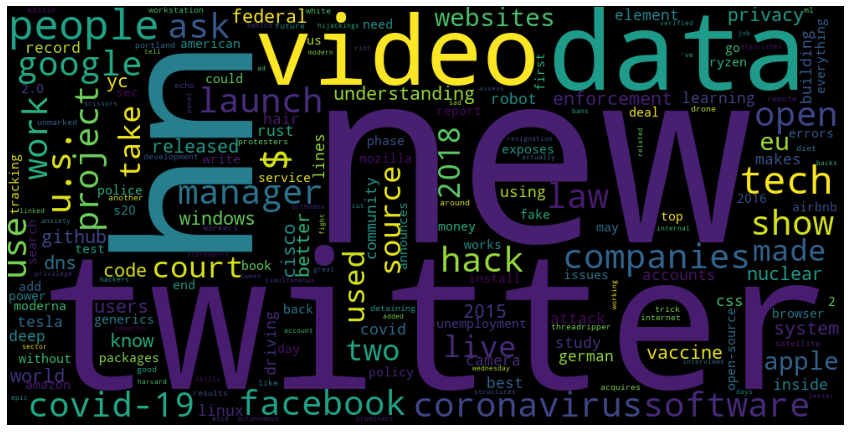

In [7]:
word_could_dict=Counter(basic_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Part of Speech - Tags
```
    CD cardinal digit
    FW foreign word
    JJ adjective 'big'
    JJR adjective, comparative 'bigger'
    JJS adjective, superlative 'biggest'
    NN noun, singular 'desk'
    NNS noun plural 'desks'
    NNP proper noun, singular 'Harrison'
    NNPS proper noun, plural 'Americans'
    RBR adverb, comparative better
    RBS adverb, superlative best
    VB verb, base form take
    VBD verb, past tense took
    VBG verb, gerund/present participle taking
    VBN verb, past participle taken
    VBP verb, sing. present, non-3d take
    VBZ verb, 3rd person sing. present takes
```

In [18]:
# I plan to take only the adjective, noun and the verb from the sentence to form the word cloud
tagged_word_list = []


for title in title_list:
    words = word_tokenize(title)
    tagged_words_list = pos_tag(words)
    for tagged_word, tagged_pos in tagged_words_list:
        if tagged_pos in ["FW","JJ","JJR","JJS","NN","NNS","NNP","NNPS","RBR","RBS","VB","VBD","VBG","VBN","VBP","VBZ"]:
            tagged_word_list.append(tagged_word.lower())

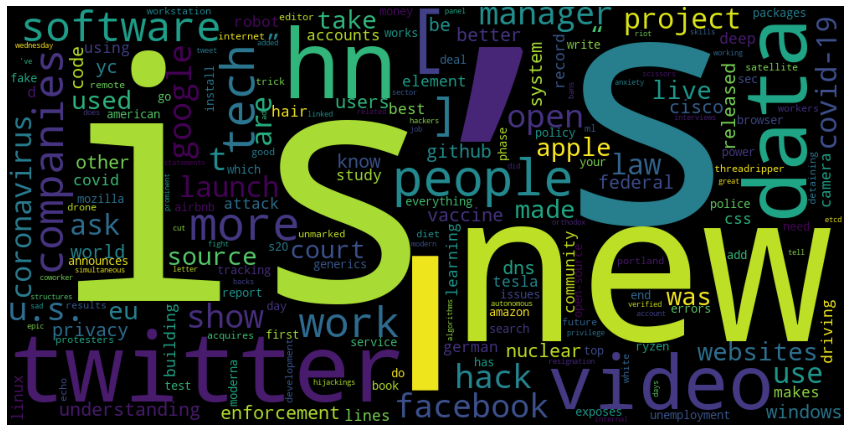

In [19]:
word_could_dict=Counter(tagged_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()